In [335]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
matplotlib.rcParams["figure.figsize"] = (20, 10)


In [336]:
df1 = pd.concat(map(pd.read_csv, ['train.csv', 'test.csv']), ignore_index=True)
df1.head(3)

,bedroom,bathrooms,area,furnishing,avalable_for,address,floor_number,facing,floor_type,gate_community,...,pooja_room,study_room,others,servant_room,store_room,maintenance_amt,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,All,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Marble,Yes,...,0,0,0,0,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,All,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Vitrified,Yes,...,0,0,0,0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,All,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Vitrified,Yes,...,0,0,1,0,0,Maintenance 1/ (/ month,23000,60000,1.0,22999.0


Size of the data

In [337]:
df1.shape

(16245, 30)

Dropping Unnecessary columns

In [338]:
df2 = df1.drop(['maintenance_amt', 'no_room','avalable_for', 'floor_type', "wheelchairadption", 'others', 'pooja_room', 'study_room', 'others','corner_pro', 'petfacility', 'aggDur', 'noticeDur'], axis = 'columns')

In [339]:
df2.head(2)

,bedroom,bathrooms,area,furnishing,address,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Yes,0,0,2,5 to 10 Year Old,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Yes,2,0,2,1 to 5 Year Old,0,0,0,40000,0.0,14000.0


Remove all the NA values

In [340]:
df2.isnull().sum()

bedroom           0
bathrooms         0
area              0
furnishing        0
address           0
floor_number      0
facing            0
gate_community    0
parking           0
lightbill         0
powerbackup       0
propertyage       0
servant_room      0
store_room        0
brok_amt          0
deposit_amt       0
mnt_amt           0
rent              0
dtype: int64

In [341]:
df3 = df2.copy()
df3.shape

(16245, 18)

In [342]:
df3.head(1)

,bedroom,bathrooms,area,furnishing,address,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Yes,0,0,2,5 to 10 Year Old,0,0,0,3,0.0,20000.0


Manage the categorical Values

**1. Property Age**

In [343]:
df3['propertyage'].unique()

array(['5 to 10 Year Old', '1 to 5 Year Old', '10+ Year Old',
       '0 to 1 Year Old', 'Under Construction', 'NO age'], dtype=object)

In [344]:
# remove 'No age' rows

df4 = df3[df3['propertyage'] != 'NO age'] # no age rows are removed.
df4['propertyage'].unique()

array(['5 to 10 Year Old', '1 to 5 Year Old', '10+ Year Old',
       '0 to 1 Year Old', 'Under Construction'], dtype=object)

In [345]:
def prop_age(x):
  if x == 'Under Construction':
    return 0
  elif x == '10+ Year Old':
    return 10
  elif x == '5 to 10 Year Old':
    return 7.5
  elif x == '1 to 5 Year Old':
    return 3
  else:
    return 0.5

df5 = df4.copy()
df5['propertyage'] = df4['propertyage'].apply(prop_age)
df5['propertyage'].unique()


array([ 7.5,  3. , 10. ,  0.5,  0. ])

**Drop Mainenance Amount**

In [346]:
df5['furnishing'].unique()

array(['Unfurnished', 'Semifurnished', 'Furnished', 'Unfurnishe'],
      dtype=object)

In [347]:
def furnish(x):
  if x == 'Unfurnishe':
    return 'Unfurnished'
  else:
    return x

df7  = df5.copy()
df7['furnishing'] = df5['furnishing'].apply(furnish)
df7['furnishing'].unique()

array(['Unfurnished', 'Semifurnished', 'Furnished'], dtype=object)

In [348]:
df7.head()

,bedroom,bathrooms,area,furnishing,address,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,brok_amt,deposit_amt,mnt_amt,rent
0,2,2,1050.0,Unfurnished,"Sadguru hights, Pingale Wasti, , Pune, Maharas...",5,West,Yes,0,0,2,7.5,0,0,0,3,0.0,20000.0
1,2,2,760.0,Unfurnished,"Manav Silver Springs, Wagholi, , Pune, Maharas...",5,East,Yes,2,0,2,3.0,0,0,0,40000,0.0,14000.0
2,3,3,0.0,Semifurnished,"Saarrthi Souvenir, Mahalunge, , Pune, Maharashtra",1,South-West,Yes,1,0,2,3.0,0,0,23000,60000,1.0,22999.0
3,1,1,628.0,Furnished,"Dhan Residency, Wanowrie, , Pune, Maharashtra",3,East,Yes,1,0,0,10.0,0,0,0,40000,0.0,13000.0
4,2,2,668.0,Semifurnished,"Saptsiddhi Savali Homes, Uruli Devachi, , Pune...",6,South,Yes,1,1,1,3.0,0,0,0,20,0.0,7500.0


**Removing the houses with no direction**

In [349]:
df7['facing'].unique()
df8 = df7.copy()
df8 = df7[df7['facing'] !='No Direction']

df8['facing'].unique()

array(['West', 'East', 'South-West', 'South', 'North', 'North-West',
       'South-East', 'North-East'], dtype=object)

<ipython-input-350-5deafc12240c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df7.corr()


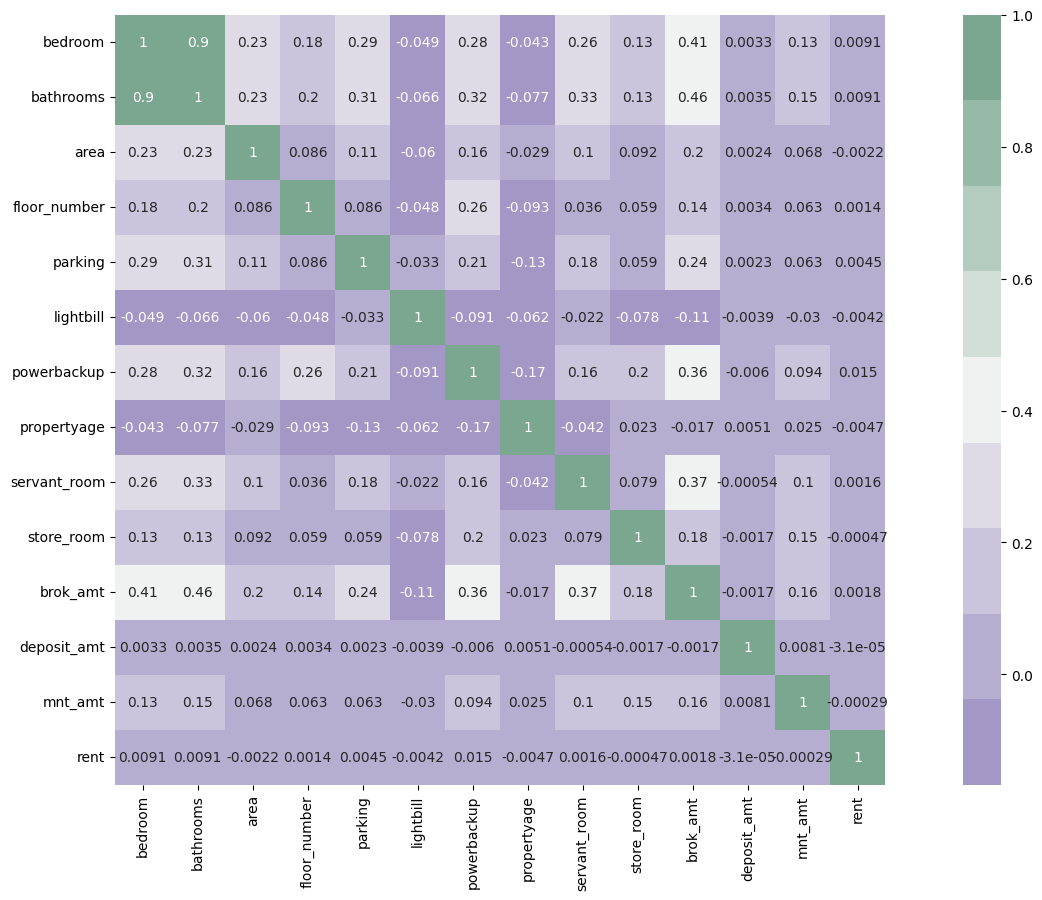

In [350]:
cmap = sns.diverging_palette(275,150,  s=40, l=65, n=9)
corrmat = df7.corr()
plt.subplots(figsize=(20,10))
sns.heatmap(corrmat,cmap= cmap,annot=True, square=True);

# Observations
bedroom - bathroom: 0.9
brok_amt- bathroom: 0.46

so, remove bathroom

In [351]:
df7 = df7.drop(['bathrooms'],axis= 'columns')

# One Hot Encoding for All Categorical Columns

In [352]:
#df7_OneHotEnc = pd.get_dummies(df7, columns = ['furnishing', 'facing', 'gate_community', ])
#rint(df7_OneHotEnc)

In [353]:
#df7_OneHotEnc.head()

In [354]:
#df8 = df7_OneHotEnc.copy()

# **Feature** **Engineering**

**Price Per Square Feet**

remove the rows with zero areas.
Also the minimum square feet of a 1 bhk is 400 sq. feet. So remove values below that

In [355]:


df8 = df8[df8['area']>=400]

df8['area'].min()

400.0

In [356]:
df9 = df8.copy()
# rent_per_square_feet
df9['rps'] = df9['rent']/df9['area']
df9.head()

df9['rps'].describe()

count    7537.000000
mean       21.334558
std         6.942303
min         0.178633
25%        16.666667
50%        20.625000
75%        25.000000
max        66.666667
Name: rps, dtype: float64

In [357]:
#brok_amt_stat = df9.groupby('brok_amt')['brok_amt'].agg('count')
df9['brok_amt'].describe()

count      7537.000000
mean      10628.227677
std       18796.781330
min           0.000000
25%           0.000000
50%           0.000000
75%       18000.000000
max      275000.000000
Name: brok_amt, dtype: float64

**Combining Broker fee, deposit_amt and min_amt**

In [358]:
df10 = df9.copy()
df10['initial_total_fee'] = df10['brok_amt'] + df10['deposit_amt'] +df10['mnt_amt']

In [359]:
df11 = df10.drop(['brok_amt', 'deposit_amt', 'mnt_amt'], axis = 'columns')
df11['initial_total_fee'].describe()
# drop rows with initial fee less than 1000


count    7.537000e+03
mean     2.910746e+05
std      2.073364e+07
min      0.000000e+00
25%      2.000000e+04
50%      4.000000e+04
75%      6.500000e+04
max      1.800052e+09
Name: initial_total_fee, dtype: float64

**What to do with the address?**

In [360]:
len(df11['address'].unique())
# there are 5661 unique locations.

4476

In [361]:
# what is the structure of the string?
#for address in df11['address'][1:100]:
  #print(address.split(",")[1])

In [362]:
df12 = df11.copy()
df12['locations'] = df12['address'].apply(lambda x: x.split(",")[1])
len(df12['locations'].unique())

923

**ANy location with a number of data points less than 10 will be called other**

In [363]:
loc_stat = df12.groupby('locations')['locations'].agg('count').sort_values(ascending = False)
loc_stat

locations
 Wagholi            354
                    265
 Wakad              248
 Hinjewadi          247
 Kharadi            225
                   ... 
 Pandav Nagar         1
 Panchwati            1
 Panchawati           1
 Hasabnis Bakhal      1
wakad                 1
Name: locations, Length: 923, dtype: int64

In [364]:
location_lessthan10 = loc_stat[loc_stat<=10]

In [365]:
len(df12['locations'].unique())

923

In [366]:
df12.locations = df12.locations.apply(lambda x: 'other' if x in location_lessthan10 else x)

In [367]:
df12['locations'].unique()
len(df12['locations'].unique())

124

**remove rows with empty locations**

In [368]:
df13 = df12[df12['locations']!=' ']
len(df13['locations'].unique())

123

In [369]:
print(df13['locations'])

0                  other
1                Wagholi
3               Wanowrie
4                  other
6              Baner-Sus
              ...       
16237     Eon Free Zone 
16239     Eon Free Zone 
16242            Wagholi
16243              Aundh
16244              other
Name: locations, Length: 7272, dtype: object


In [370]:
# the length of location string should be atleast 3 .

df13 = df13.dropna()

**Now there are only 142 unique addresses.**

In [371]:
df13 = df12.drop(['address'], axis = 'columns')

# ***Outlier Removal***

**The extremities should be removed to not have any issues later with the data.**

In [372]:
df13.head()

,bedroom,bathrooms,area,furnishing,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,rent,rps,initial_total_fee,locations
0,2,2,1050.0,Unfurnished,5,West,Yes,0,0,2,7.5,0,0,20000.0,19.047619,3.0,other
1,2,2,760.0,Unfurnished,5,East,Yes,2,0,2,3.0,0,0,14000.0,18.421053,40000.0,Wagholi
3,1,1,628.0,Furnished,3,East,Yes,1,0,0,10.0,0,0,13000.0,20.700637,40000.0,Wanowrie
4,2,2,668.0,Semifurnished,6,South,Yes,1,1,1,3.0,0,0,7500.0,11.227545,20.0,other
6,3,3,1530.0,Semifurnished,2,East,Yes,2,0,2,3.0,0,0,28000.0,18.300654,28003.0,Baner-Sus


In [373]:
df13['rps'].describe()

count    7537.000000
mean       21.334558
std         6.942303
min         0.178633
25%        16.666667
50%        20.625000
75%        25.000000
max        66.666667
Name: rps, dtype: float64

Considering the normal distribution, most of the data would be lying in within one standard deviation from the mean. So, others can be removed. This should be done based on the mean and std of each location.

In [374]:
df13.shape

(7537, 17)

In [375]:
# remove rows where rps is not a number

def remove_na_rps(x):
  try:
    tmp = int(x)
    return x
  except:
    return None

df14  = df13.copy()
df14['rps'] = df14['rps'].apply(remove_na_rps)


df15 = df14[df14['rps']!= None]

df15.shape

(7537, 17)

In [376]:
df14.head()

,bedroom,bathrooms,area,furnishing,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,rent,rps,initial_total_fee,locations
0,2,2,1050.0,Unfurnished,5,West,Yes,0,0,2,7.5,0,0,20000.0,19.047619,3.0,other
1,2,2,760.0,Unfurnished,5,East,Yes,2,0,2,3.0,0,0,14000.0,18.421053,40000.0,Wagholi
3,1,1,628.0,Furnished,3,East,Yes,1,0,0,10.0,0,0,13000.0,20.700637,40000.0,Wanowrie
4,2,2,668.0,Semifurnished,6,South,Yes,1,1,1,3.0,0,0,7500.0,11.227545,20.0,other
6,3,3,1530.0,Semifurnished,2,East,Yes,2,0,2,3.0,0,0,28000.0,18.300654,28003.0,Baner-Sus


In [377]:
df15.head()

,bedroom,bathrooms,area,furnishing,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,rent,rps,initial_total_fee,locations
0,2,2,1050.0,Unfurnished,5,West,Yes,0,0,2,7.5,0,0,20000.0,19.047619,3.0,other
1,2,2,760.0,Unfurnished,5,East,Yes,2,0,2,3.0,0,0,14000.0,18.421053,40000.0,Wagholi
3,1,1,628.0,Furnished,3,East,Yes,1,0,0,10.0,0,0,13000.0,20.700637,40000.0,Wanowrie
4,2,2,668.0,Semifurnished,6,South,Yes,1,1,1,3.0,0,0,7500.0,11.227545,20.0,other
6,3,3,1530.0,Semifurnished,2,East,Yes,2,0,2,3.0,0,0,28000.0,18.300654,28003.0,Baner-Sus


In [378]:
def remove_rps_outliers(df):
  df_out = pd.DataFrame()
  for key, subdf in df.groupby('locations'):
    m, std = np.mean(subdf.rps), np.std(subdf.rps)
    filtered_df = subdf[(m-std <= subdf.rps) & (subdf.rps <=m+std)]
    df_out = pd.concat([df_out, filtered_df],ignore_index = True)
  return df_out

df16 = remove_rps_outliers(df15)
df16.shape


(5444, 17)

**Now we only have the data within 1 std deviation range**

In [379]:
df16 = df15      #.drop(['rent'], axis = 'columns')

# Visualization do it later

## Building the Machine Learning Model

In [380]:
df16.head()

,bedroom,bathrooms,area,furnishing,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,rent,rps,initial_total_fee,locations
0,2,2,1050.0,Unfurnished,5,West,Yes,0,0,2,7.5,0,0,20000.0,19.047619,3.0,other
1,2,2,760.0,Unfurnished,5,East,Yes,2,0,2,3.0,0,0,14000.0,18.421053,40000.0,Wagholi
3,1,1,628.0,Furnished,3,East,Yes,1,0,0,10.0,0,0,13000.0,20.700637,40000.0,Wanowrie
4,2,2,668.0,Semifurnished,6,South,Yes,1,1,1,3.0,0,0,7500.0,11.227545,20.0,other
6,3,3,1530.0,Semifurnished,2,East,Yes,2,0,2,3.0,0,0,28000.0,18.300654,28003.0,Baner-Sus


In [381]:
df16.head()

,bedroom,bathrooms,area,furnishing,floor_number,facing,gate_community,parking,lightbill,powerbackup,propertyage,servant_room,store_room,rent,rps,initial_total_fee,locations
0,2,2,1050.0,Unfurnished,5,West,Yes,0,0,2,7.5,0,0,20000.0,19.047619,3.0,other
1,2,2,760.0,Unfurnished,5,East,Yes,2,0,2,3.0,0,0,14000.0,18.421053,40000.0,Wagholi
3,1,1,628.0,Furnished,3,East,Yes,1,0,0,10.0,0,0,13000.0,20.700637,40000.0,Wanowrie
4,2,2,668.0,Semifurnished,6,South,Yes,1,1,1,3.0,0,0,7500.0,11.227545,20.0,other
6,3,3,1530.0,Semifurnished,2,East,Yes,2,0,2,3.0,0,0,28000.0,18.300654,28003.0,Baner-Sus


# **One Hot Encoding**

In [382]:
# Example
pd.get_dummies(df16.locations)


,,Akurdi,Ambegaon,Ambegaon Bk,Ambegaon Budruk,Anand Nagar,Ashoka Nagar,Aundh,B.T Kawade Road,Balewadi,...,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Warje Malwadi,Wireless Colony,Yerwada,Yewalewadi,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16239,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16242,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
16243,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [383]:
df16_OHE = pd.get_dummies(df16, columns = ['furnishing', 'gate_community', 'locations', 'facing'])

In [384]:
df16_OHE.head()

,bedroom,bathrooms,area,floor_number,parking,lightbill,powerbackup,propertyage,servant_room,store_room,...,locations_ Yewalewadi,locations_other,facing_East,facing_North,facing_North-East,facing_North-West,facing_South,facing_South-East,facing_South-West,facing_West
0,2,2,1050.0,5,0,0,2,7.5,0,0,...,0,1,0,0,0,0,0,0,0,1
1,2,2,760.0,5,2,0,2,3.0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,1,628.0,3,1,0,0,10.0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2,2,668.0,6,1,1,1,3.0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,3,3,1530.0,2,2,0,2,3.0,0,0,...,0,0,1,0,0,0,0,0,0,0


Concatanating the dummy columns for the ML model

In [385]:
dummies = pd.get_dummies(df16.locations)

In [386]:
df17 = pd.concat([df16, dummies.drop('other', axis = 'columns')], axis = 'columns')

df17 = df17.drop(['locations', 'furnishing', 'facing', 'gate_community'],axis = 'columns', )

In [387]:
df17.columns

Index(['bedroom', 'bathrooms', 'area', 'floor_number', 'parking', 'lightbill',
       'powerbackup', 'propertyage', 'servant_room', 'store_room',
       ...
       ' Wadgaon Sheri', ' Wagholi', ' Wakad', ' Wanowrie', ' Wanwadi',
       ' Warje', ' Warje Malwadi', ' Wireless Colony', ' Yerwada',
       ' Yewalewadi'],
      dtype='object', length=136)

In [388]:
df18 = df17.copy()

X = df18.drop(['rent'],axis= 'columns')

Y = df18.rent

In [389]:
X.head()

,bedroom,bathrooms,area,floor_number,parking,lightbill,powerbackup,propertyage,servant_room,store_room,...,Wadgaon Sheri,Wagholi,Wakad,Wanowrie,Wanwadi,Warje,Warje Malwadi,Wireless Colony,Yerwada,Yewalewadi
0,2,2,1050.0,5,0,0,2,7.5,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,2,760.0,5,2,0,2,3.0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,1,1,628.0,3,1,0,0,10.0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2,2,668.0,6,1,1,1,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,3,3,1530.0,2,2,0,2,3.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [390]:
Y.head()

0    20000.0
1    14000.0
3    13000.0
4     7500.0
6    28000.0
Name: rent, dtype: float64

In [394]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

**Linear Regression Model**

In [395]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()

LR.fit(x_train, y_train)

LR.score(x_test, y_test)

0.8040621545911039

Cross validation

In [396]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), X, Y, cv=cv)

array([0.80406215, 0.79365393, 0.7268416 , 0.79666081, 0.80019508])

## Random Forest Model

In [401]:
# importing random forest regressor from assemble module
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
                                  random_state=0)

# fit the regressor with x and y data
regressor.fit(x_train, y_train)

score3 = regressor.score(x_train, y_train)
print("Train Accuracy:", score3)

Train Accuracy: 0.9978206142316812


In [408]:
y_pred = regressor.predict(x_test)

plt.figure
print('test_accuracy:', regressor.score(x_test,y_test))

test_accuracy: 0.9896775597857804


# **Linear Regression: 80 % Accuracy**

# **Random Forest: 98.97 % Accuracy**